In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

housing = pd.read_csv('data/housing.csv')
housing.dropna(inplace=True)
housing.drop(columns=['ocean_proximity'], inplace=True)

X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [13]:
import tensorflow as tf
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
489/489 [==============================] - 2s 3ms/step - loss: 48742846464.0000 - root_mean_squared_error: 220777.8281 - val_loss: 24154550272.0000 - val_root_mean_squared_error: 155417.3438
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 13205785600.0000 - root_mean_squared_error: 114916.4297 - val_loss: 9568480256.0000 - val_root_mean_squared_error: 97818.6094
Epoch 3/10
489/489 [==============================] - 1s 2ms/step - loss: 8712584192.0000 - root_mean_squared_error: 93341.2266 - val_loss: 7486113280.0000 - val_root_mean_squared_error: 86522.3281
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 7094617088.0000 - root_mean_squared_error: 84229.5469 - val_loss: 6314245120.0000 - val_root_mean_squared_error: 79462.2266
Epoch 5/10
489/489 [==============================] - 1s 2ms/step - loss: 6100781056.0000 - root_mean_squared_error: 78107.5000 - val_loss: 5566858752.0000 - val_root_mean_squared_error: 74611.3828
Epoc

In [14]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

96/96 [==============================] - 0s 2ms/step - loss: 4448532992.0000 - root_mean_squared_error: 66697.3203


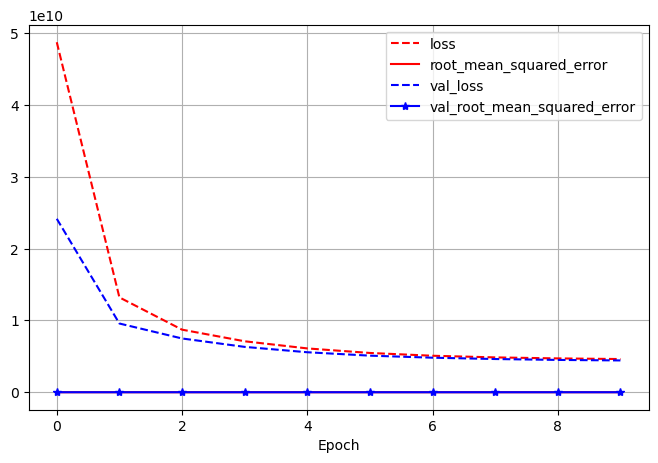

In [18]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize = (8,5), grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()